# **IMPORTS**

---

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [114]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.metrics import classification_report

In [115]:
import os

```
⠀⠀⠀⠀⠀⠀⣀⣤⡤
⠀⠀⠀⠀⢀⣾⣿⠋
⠀⠀⠀⣠⣾⣿⡟
⠀⠀⢸⠛⠉⢹⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡠⠄⠠⣀
⠀⠀⡘⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⣠⠖⠉⠀⠀⠀⣾⣿⣦⡀
⠀⠀⡇⠀⠀⠀⢡⠄⠀⠀⣀⣀⣀⣠⠊⠀⠀⠀⠀⡠⠞⠛⠛⠛⠛⡀
⠀⠀⢃⠀⠀⠀⠀⠗⠚⠉⠉⠀⠈⠁⠀⠀⠀⢀⡔⠁⠀
⠀⠀⠸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣴⣶⣄⠲⡎
⠀⠀⠀⠃⠀⠀⢠⣤⡀⠀⠀⠀⠀⣿⣿⣿⠀⠘⡄
⠀⠀⠀⡆⠀⠀⣿⣿⡇⠀⠀⠀⠀⠈⠛⠉⣴⣆⢹⡄
⠀⠀⠀⣇⢰⡧⣉⡉⠀⠀⢀⡀⠀⣀⣀⣠⣿⡷⢠⡇
⠀⠀⠀⢻⠘⠃⠈⠻⢦⠞⠋⠙⠺⠋⠉⠉⠉⢡⠟
⠀⠀⠀⠀⠳⢄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⠋⠀⠀
```

# **SETTINGS**
---

In [116]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline

# Configuration to set so that all the Seaborn figures come out with this size
%config Inlinebackend.figure_format= 'retina'

In [117]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

In [118]:
# Set the max displayable columns to max
pd.set_option('display.max_columns', None)

In [119]:
# Activates XLA (for JIT compiler)
os.environ["TF_XLA_FLAGS"]= "--tf_xla_enable_xla_devices"

# Uses the right memory when using GPU
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]= "true"

# **DATA**

---

In [120]:
# data path for loading
fd001_train_path= "../data/02_processed/FD001_train.csv"
fd001_test_path=  "../data/02_processed/FD001_test.csv"
fd001_rul_path=   "../data/02_processed/FD001_RUL.csv"

In [121]:
# loading the train dataset
FD001_train= pd.read_csv(fd001_train_path)
FD001_train.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189


In [122]:
# loading the test dataset
FD001_test= pd.read_csv(fd001_test_path)
FD001_test.head(3)

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,192,191
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,192,190
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,192,189


In [123]:
# loading the rul for validation
FD001_rul = pd.read_csv(fd001_rul_path)
FD001_rul.head(3)

,true_rul
0,112
1,98
2,69


# **FEATURE ENGINEERING**

---

> As far as I can tell, XGBR is the most op model, so I'll be doing this feature engineering exclusively for XGBR.

In [ ]:
def feature_engineering(df):
  X= df.copy()
  
  # Normalize features
  for unit in X["unit"].unique():
    unit_mask= X["unit"]== unit
    
    # Initial values for normalization
    initial_T30=  X.loc[unit_mask, "sensor_measure_3"].iloc[0]
    initial_Ps30= X.loc[unit_mask, "sensor_measure_11"].iloc[0]
    initial_T50=  X.loc[unit_mask, "sensor_measure_4"].iloc[0]

    # Normalize key features
    X.loc[unit_mask, "T30_norm"]=  X.loc[unit_mask, "sensor_measure_3"] / initial_T30
    X.loc[unit_mask, "Ps30_norm"]= X.loc[unit_mask, "sensor_measure_11"] / initial_Ps30
    X.loc[unit_mask, "T50_norm"]=  X.loc[unit_mask, "sensor_measure_4"] / initial_T50

    # Exchange rate
    X.loc[unit_mask, "d_T30"]=  X.loc[unit_mask, "T30_norm"].diff().fillna(0)
    X.loc[unit_mask, "d_Ps30"]= X.loc[unit_mask, "Ps30_norm"].diff().fillna(0)
    X.loc[unit_mask, "d_T50"]=  X.loc[unit_mask, "T50_norm"].diff().fillna(0)

  # Physical health indicators
  X["thermal_stress"]= X["sensor_measure_4"] - X["sensor_measure_3"]
  X["pressure_ratio"]= X["sensor_measure_11"] / X["sensor_measure_7"]

  # Drop original features
  X= X.drop(columns=["sensor_measure_3", "sensor_measure_4", "sensor_measure_7", "sensor_measure_11"])

  # Drop not needed features
  cols_to_drop= [
    "op_setting_1", "op_setting_2", "op_setting_3", "max_cycle", "cycle",
    "sensor_measure_1", "sensor_measure_5", "sensor_measure_10",
    "sensor_measure_16", "sensor_measure_18", "sensor_measure_19"
  ]

  X= X.drop(columns=cols_to_drop, errors="ignore")

  return X

In [125]:
def evaluate_permutation_importance(df_train, df_test, target_col="RUL"):
  from sklearn.inspection import permutation_importance
    
  # data split
  X_train= df_train.drop([target_col, "unit"], axis=1)
  y_train= df_train[target_col]

  X_test= df_test.drop([target_col, "unit"], axis=1)
  y_test= df_test[target_col]

  # dump check
  if set(X_train.columns) != set(X_test.columns):
    raise ValueError("poronga")

  # model train
  model= XGBRegressor(random_state=69)
  model.fit(X_train, y_train)
    
  # permutation importance
  result= permutation_importance(
    model, X_test, y_test, 
    n_repeats=10, 
    random_state=69,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    )

  # sort
  sorted_idx= result.importances_mean.argsort()[::-1]
  for i in sorted_idx:
    feature_name=    X_test.columns[i]
    mean_importance= result.importances_mean[i]
    std_importance=  result.importances_std[i]
    print(f"{feature_name:<20}: {mean_importance:.4f} ± {std_importance:.4f}")

  # results df
  importance_df= pd.DataFrame({
    "feature":    X_test.columns,
    "mean":       result.importances_mean,
    "std":        result.importances_std,
    })

  return result, # importance_df

In [126]:
FD001_train

,unit,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_measure_1,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_5,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_10,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_16,sensor_measure_17,sensor_measure_18,sensor_measure_19,sensor_measure_20,sensor_measure_21,max_cycle,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,21.61,551.43,2388.19,9065.52,1.3,48.07,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,21.61,550.86,2388.23,9065.11,1.3,48.04,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,21.61,550.94,2388.24,9065.90,1.3,48.09,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,21.61,550.68,2388.25,9073.72,1.3,48.39,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


# **VALIDATING THE NEW FEATURES**

---

In [128]:
FD001_train_new= feature_engineering(FD001_train)
FD001_test_new=  feature_engineering(FD001_test)

In [129]:
mr= evaluate_permutation_importance(FD001_train_new, FD001_test_new)

Ps30_norm           : 2.3827 ± 0.1930
sensor_measure_9    : 0.9491 ± 0.0891
sensor_measure_14   : 0.7957 ± 0.1414
T50_norm            : 0.7068 ± 0.1167
pressure_ratio      : 0.4698 ± 0.1433
T30_norm            : 0.4479 ± 0.0397
d_Ps30              : 0.3365 ± 0.0934
sensor_measure_13   : 0.3153 ± 0.0628
sensor_measure_2    : 0.2396 ± 0.0787
d_T50               : 0.1280 ± 0.0499
thermal_stress      : 0.1171 ± 0.0467
d_T30               : 0.0721 ± 0.0319
sensor_measure_12   : 0.0052 ± 0.0758
sensor_measure_6    : -0.0369 ± 0.0121
sensor_measure_21   : -0.0652 ± 0.0765
sensor_measure_15   : -0.0781 ± 0.0380
sensor_measure_17   : -0.1528 ± 0.0503
sensor_measure_8    : -0.2350 ± 0.0635
sensor_measure_20   : -0.2529 ± 0.0330


In [130]:
FD001_train_new[FD001_train_new["unit"] == 20]

,unit,sensor_measure_2,sensor_measure_6,sensor_measure_8,sensor_measure_9,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_17,sensor_measure_20,sensor_measure_21,RUL,T30_norm,Ps30_norm,T50_norm,d_T30,d_Ps30,d_T50,thermal_stress,pressure_ratio
3934,20,643.00,21.61,2388.10,9063.70,521.93,2388.02,8136.61,8.4498,391,38.88,23.2767,233,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-185.57,0.085935
3935,20,642.72,21.61,2388.13,9055.40,520.66,2388.06,8136.47,8.4217,393,38.79,23.2626,232,0.999296,1.002313,1.001638,-0.000704,0.002313,0.001638,-182.15,0.086083
3936,20,642.90,21.61,2388.05,9055.83,521.14,2388.07,8136.89,8.4432,391,38.79,23.2760,231,0.998390,0.998528,1.000000,-0.000906,-0.003785,-0.001638,-183.01,0.085891
3937,20,642.42,21.61,2388.04,9057.87,521.63,2388.09,8133.40,8.4390,393,38.87,23.2784,230,0.995679,1.001051,1.009086,-0.002711,0.002523,0.009086,-165.94,0.085987
3938,20,642.55,21.61,2388.06,9054.13,521.48,2388.09,8135.61,8.4171,392,38.88,23.2748,229,0.997383,0.999790,1.001851,0.001705,-0.001262,-0.007235,-178.81,0.085976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4163,20,643.57,21.61,2388.24,9072.49,520.12,2388.24,8144.08,8.4887,396,38.60,23.1231,4,1.009938,1.012616,1.019333,0.005007,-0.001051,0.001567,-174.22,0.087215
4164,20,643.89,21.61,2388.22,9075.48,519.74,2388.22,8146.48,8.4800,397,38.74,22.9885,3,1.008479,1.017872,1.018102,-0.001459,0.005257,-0.001232,-173.63,0.087884
4165,20,643.85,21.61,2388.27,9075.69,519.28,2388.29,8139.51,8.5230,397,38.33,23.1460,2,1.011416,1.012826,1.019782,0.002937,-0.005046,0.001681,-175.94,0.087369
4166,20,643.93,21.61,2388.26,9077.16,519.97,2388.23,8143.94,8.5058,396,38.46,22.9783,1,1.007567,1.014087,1.023449,-0.003849,0.001262,0.003667,-164.67,0.087425


In [131]:
features_to_drop= [
  "sensor_measure_20", "sensor_measure_13", "sensor_measure_15",
  "sensor_measure_8", "sensor_measure_17", "sensor_measure_2",
  "sensor_measure_12", "sensor_measure_21", "sensor_measure_6"
]

In [132]:
FD001_train_new.drop(features_to_drop, axis=1, inplace=True)
FD001_test_new.drop(features_to_drop, axis=1, inplace=True)

# **TRAINING**

---

As far we want to predict in a realistic way, we only cares (or mainly) about the last X last cycles of the engine. Regarding to the documentation, *"For an engine degradation scenario an early prediction is preferred over late predictions"*.

In [ ]:
def model_eval(model, name, X_train, X_test, y_train, y_test):
  # Model predictions
  y_pred_train= model.predict(X_train)
  y_pred_test=  model.predict(X_test)

  # Metrics on train
  mae_train=  mean_absolute_error(y_train, y_pred_train)
  rmse_train= root_mean_squared_error(y_train, y_pred_train)
  mse_train=  mean_squared_error(y_train, y_pred_train)
  r2_train=   r2_score(y_train, y_pred_train)

  # Metrics on test
  mae_test=  mean_absolute_error(y_test, y_pred_test)
  rmse_test= root_mean_squared_error(y_test, y_pred_test)
  mse_test=  mean_squared_error(y_test, y_pred_test)
  r2_test=   r2_score(y_test, y_pred_test)

  print(f"--- {name} TRAIN ---")
  print("MAE:",  mae_train)
  print("RMSE:", rmse_train)
  print("MSE:",  mse_train)
  print("R2:",   r2_train)

  print(f"\n--- {name} TEST ---")
  print("MAE:",  mae_test)
  print("RMSE:", rmse_test)
  print("MSE:",  mse_test)
  print("R2:",   r2_test)

  # Scatter Test
  plt.figure(figsize=(12, 4))
  plt.scatter(y_test, y_pred_test, color= "black", alpha= .2)
  m, b=   np.polyfit(y_test, y_pred_test, 1)
  plt.plot(y_test, m*y_test + b, color= "red")
  plt.title(f"{name} True vs Predicted (Test set)")
  plt.xlabel("True values")
  plt.ylabel("Predicted values")
  plt.grid(True, alpha=0.8)
  plt.show()
  

In [133]:
X_train= FD001_train_new.drop(["unit", "RUL"], axis=1)
y_train= FD001_train_new["RUL"]

X_test= FD001_test_new.drop(["unit", "RUL"], axis=1)
y_test= FD001_test_new["RUL"]

In [134]:
X_train

,sensor_measure_9,sensor_measure_14,T30_norm,Ps30_norm,T50_norm,d_T30,d_Ps30,d_T50,thermal_stress,pressure_ratio
0,9046.19,8138.62,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-189.10,0.085630
1,9044.07,8131.49,1.001334,1.000421,1.001814,0.001334,0.000421,0.001814,-188.68,0.085761
2,9052.94,8133.23,0.998924,0.995787,1.002570,-0.002409,-0.004635,0.000757,-183.79,0.085285
3,9049.48,8133.83,0.995653,0.992838,1.000907,-0.003271,-0.002949,-0.001664,-180.92,0.085003
4,9055.15,8133.80,0.995691,0.995997,1.004013,0.000038,0.003160,0.003106,-176.63,0.085343
...,...,...,...,...,...,...,...,...,...,...
20626,9065.52,8137.60,1.000883,1.014992,1.017166,-0.001290,-0.003167,-0.002328,-169.35,0.087173
20627,9065.11,8136.50,1.004967,1.014358,1.020690,0.004084,-0.000633,0.003524,-170.92,0.087209
20628,9065.90,8141.05,1.003689,1.015414,1.016846,-0.001278,0.001056,-0.003845,-174.28,0.087287
20629,9073.72,8139.29,1.005443,1.021748,1.015671,0.001754,0.006334,-0.001175,-178.73,0.087873


In [ ]:
xgbr_model= XGBRegressor(
  n_estimators=     300,
  learning_rate=    0.1,
  max_depth=        5,
  min_child_weight= 4,
  subsample=        1.0,
  colsample_bytree= 1.0,
  gamma=            0,
  reg_alpha=        0.05,
  reg_lambda=       0.8,
  random_state=     69
)

In [173]:
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

## Testing over the test set

--- xgbr TRAIN ---
MAE: 20.007267817813894
RMSE: 28.702800644341373
MSE: 823.8507648288036
R2: 0.8263515830039978

--- xgbr TEST ---
MAE: 53.43591502768988
RMSE: 67.31244324614549
MSE: 4530.965015765557
R2: 0.1319115161895752


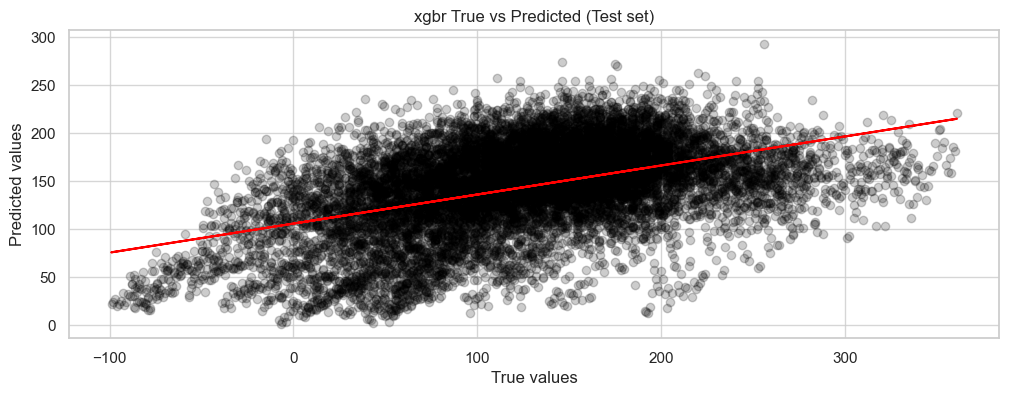

In [174]:
model_eval(xgbr_model, "xgbr", X_train, X_test, y_train, y_test)

## Testing using Train Test Split

In [147]:
X, y= FD001_train_new.drop(columns= ["RUL", "unit"]), FD001_train_new["RUL"]

X_train2, X_test2, y_train2, y_test2= train_test_split(X, y, test_size= 0.2, random_state= 69)

In [188]:
model2= XGBRegressor(
  n_estimators=     300,
  learning_rate=    0.1,
  max_depth=        5,
  min_child_weight= 4,
  subsample=        1.0,
  colsample_bytree= 1.0,
  gamma=            0,
  reg_alpha=        0.05,
  reg_lambda=       0.8,
  random_state=     69
)
model2.fit(X_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

--- xgbr tts TRAIN ---
MAE: 19.00958268262793
RMSE: 27.235347216606506
MSE: 741.7641380091158
R2: 0.8426401019096375

--- xgbr tts TEST ---
MAE: 25.270990929844118
RMSE: 35.90194064163834
MSE: 1288.9493418357226
R2: 0.7349915504455566


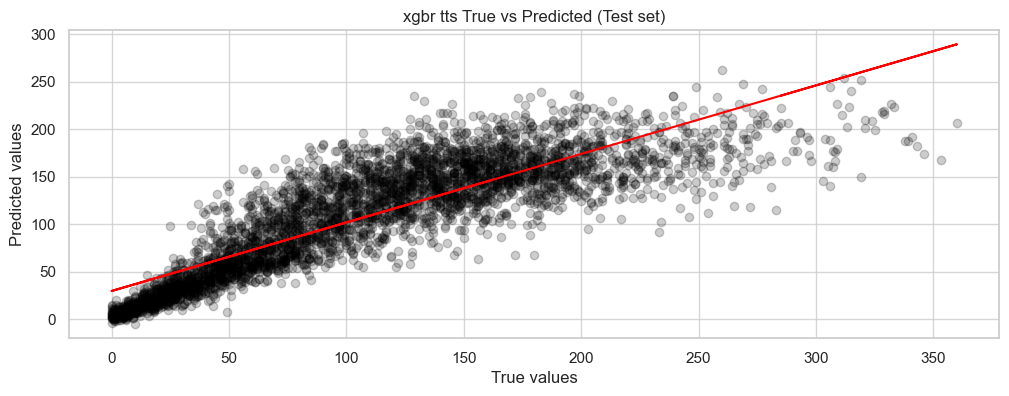

In [189]:
model_eval(model2, "xgbr tts", X_train2, X_test2, y_train2, y_test2)

In [178]:
meme= feature_engineering2(FD001_train)

In [179]:
_X, _y= meme.drop(columns= ["RUL", "unit"]), meme["RUL"]

_X_train, _X_test, _y_train, _y_test= train_test_split(_X, _y, test_size= 0.2, random_state= 69)

In [190]:
_mod= XGBRegressor(
  n_estimators=     300,
  learning_rate=    0.1,
  max_depth=        5,
  min_child_weight= 4,
  subsample=        1.0,
  colsample_bytree= 1.0,
  gamma=            0,
  reg_alpha=        0.05,
  reg_lambda=       0.8,
  random_state=     69
)
_mod.fit(_X_train, _y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=4, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

--- xgbr feat eng no drop TRAIN ---
MAE: 16.845069581219747
RMSE: 24.19651548452388
MSE: 585.4713615928039
R2: 0.8757964968681335

--- xgbr feat eng no drop TEST ---
MAE: 23.566099739907685
RMSE: 33.96867480366275
MSE: 1153.8708679169927
R2: 0.7627637386322021


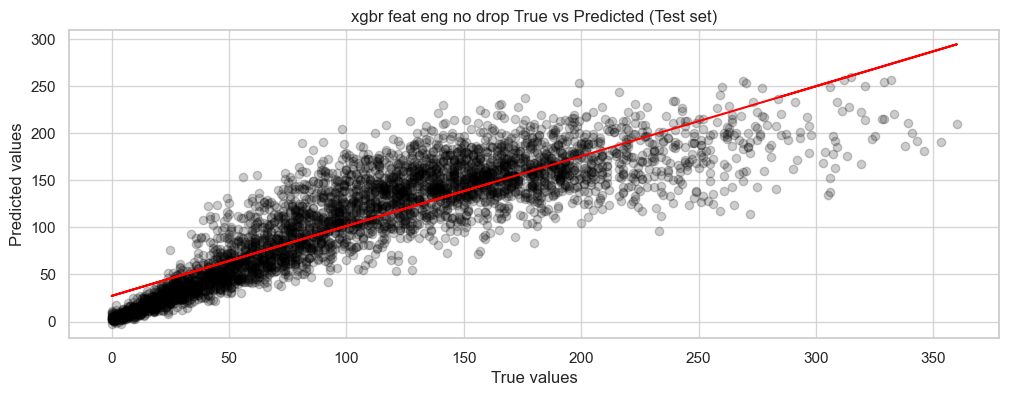

In [191]:
model_eval(_mod, "xgbr feat eng no drop", _X_train, _X_test, _y_train, _y_test)

In [193]:
_X_train.head(1)

,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_17,sensor_measure_20,sensor_measure_21,T30_norm,Ps30_norm,T50_norm,d_T30,d_Ps30,d_T50,thermal_stress,pressure_ratio
2578,642.48,1588.69,1406.37,21.61,552.64,2388.1,9057.65,47.49,521.57,2388.11,8139.33,8.4294,394,38.82,23.349,0.996469,1.000632,1.000619,-0.00027,0.001054,0.000711,-182.32,0.085933


# **EXPORT CSV**

---

In [195]:
# NOT THE BEST NAME, I KNOW IT
meme.head(3)

,unit,sensor_measure_2,sensor_measure_3,sensor_measure_4,sensor_measure_6,sensor_measure_7,sensor_measure_8,sensor_measure_9,sensor_measure_11,sensor_measure_12,sensor_measure_13,sensor_measure_14,sensor_measure_15,sensor_measure_17,sensor_measure_20,sensor_measure_21,RUL,T30_norm,Ps30_norm,T50_norm,d_T30,d_Ps30,d_T50,thermal_stress,pressure_ratio
0,1,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-189.10,0.085630
1,1,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190,1.001334,1.000421,1.001814,0.001334,0.000421,0.001814,-188.68,0.085761
2,1,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189,0.998924,0.995787,1.002570,-0.002409,-0.004635,0.000757,-183.79,0.085285


In [196]:
# Designating save path
save_path= "../data/02_processed/"

# Saving FD001 with feature engineering for train
meme.to_csv(save_path + "FD001_enhanced.csv", index=False)

# **EXPORT MODEL**

---

In [198]:
import joblib

# Designating save path
model_save_path= "../models/"

# Saving model
joblib.dump(_mod, model_save_path + "trained_model.pkl")

['../models/trained_model.pkl']